# PSD Plotting of Axial Base Ship Noise Data
Ainsley Lai

This notebook aims to familiarize myself with the work done at the Ocean Data Lab at the University of Washington.

I will mainly deal with the data here [https://uwnetid-my.sharepoint.com/personal/abadi_uw_edu/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fabadi%5Fuw%5Fedu%2FDocuments%2FOcean%20Data%20Lab%20SharePoint%2FOOI%2FShip%20Noise%20Data%20Set%2FData%20with%20avg%5Ftime%3D10%2FBenchmark%5FData%2FShips%2FAxial%5FBase]

Khirod has done most of the heavy lifting, including already making PSD plots. I'll aim to recreate them using the CSV data he organized.

The initial plan seems to be to iterate through each row and use the start/end times to query AIS via OOIPY and plot the data. It is advisable to also reference Khirod's existing code to get a handle on what else needs to happen.


In [1]:
import ooipy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import functions as fn
from ooipy.tools import ooiplotlib as ooiplt

In [3]:
df = pd.read_csv('AB_isolated_ais_10m_5_20.csv',sep = ',')
#(df['start_time'].iloc[1])
#(df['start_time'])

PULLING DATA
DATA PULLED


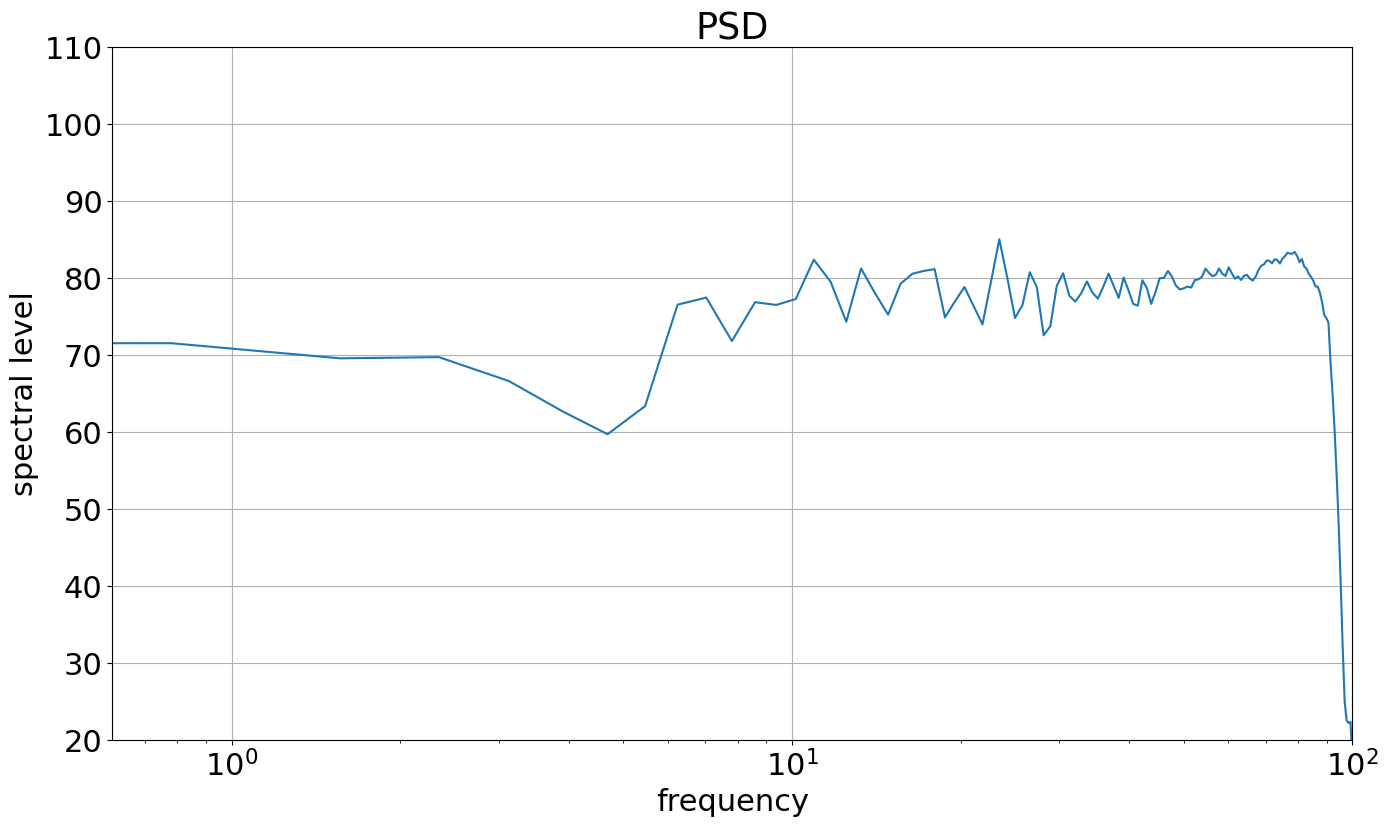

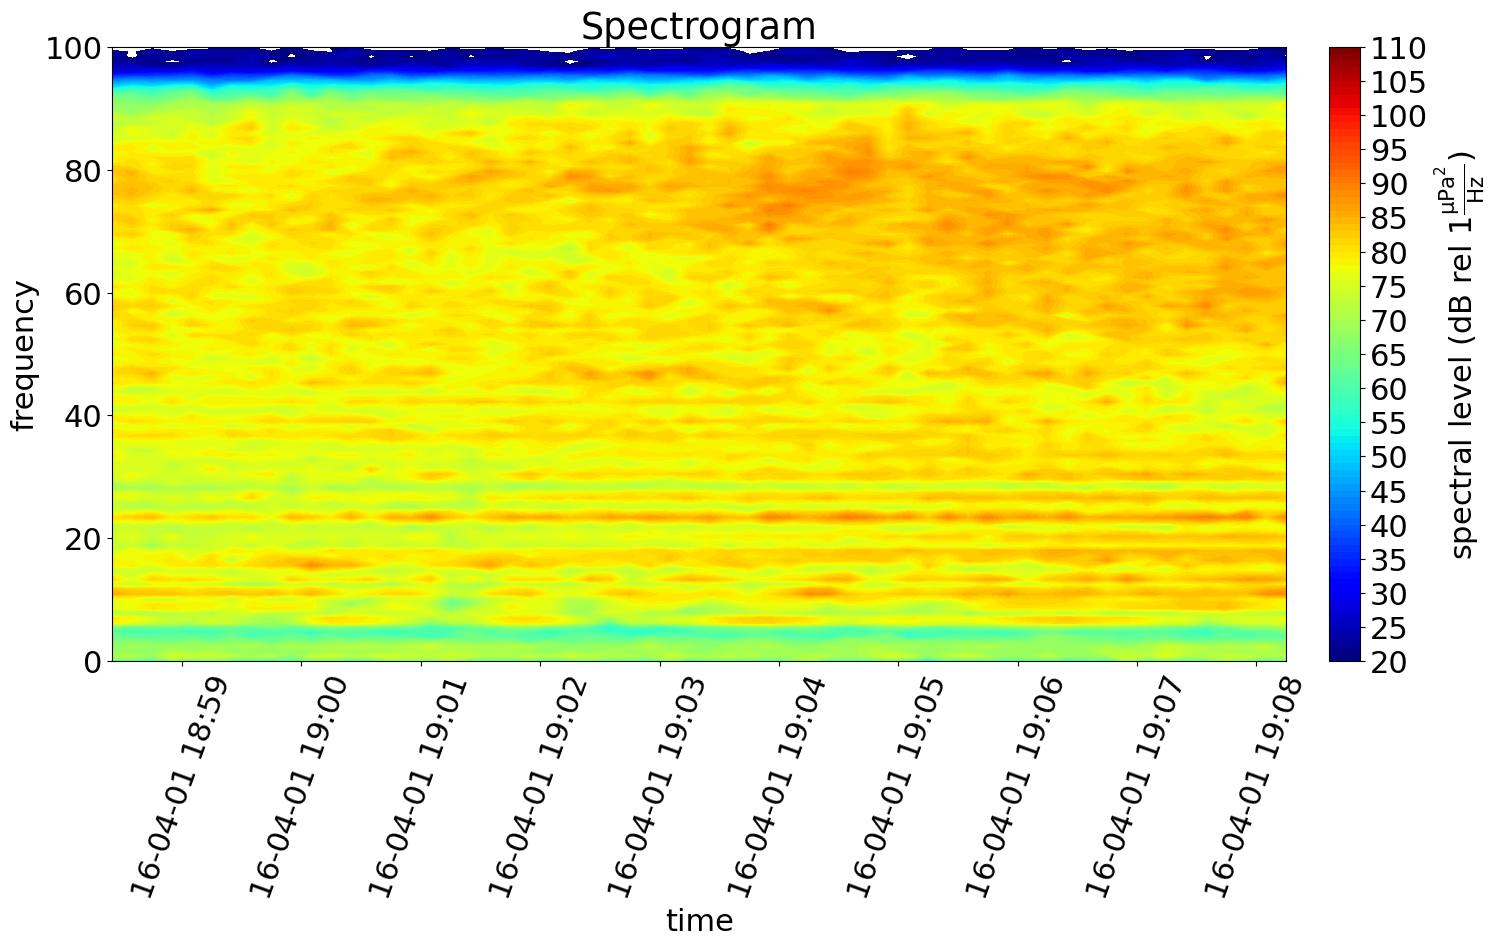

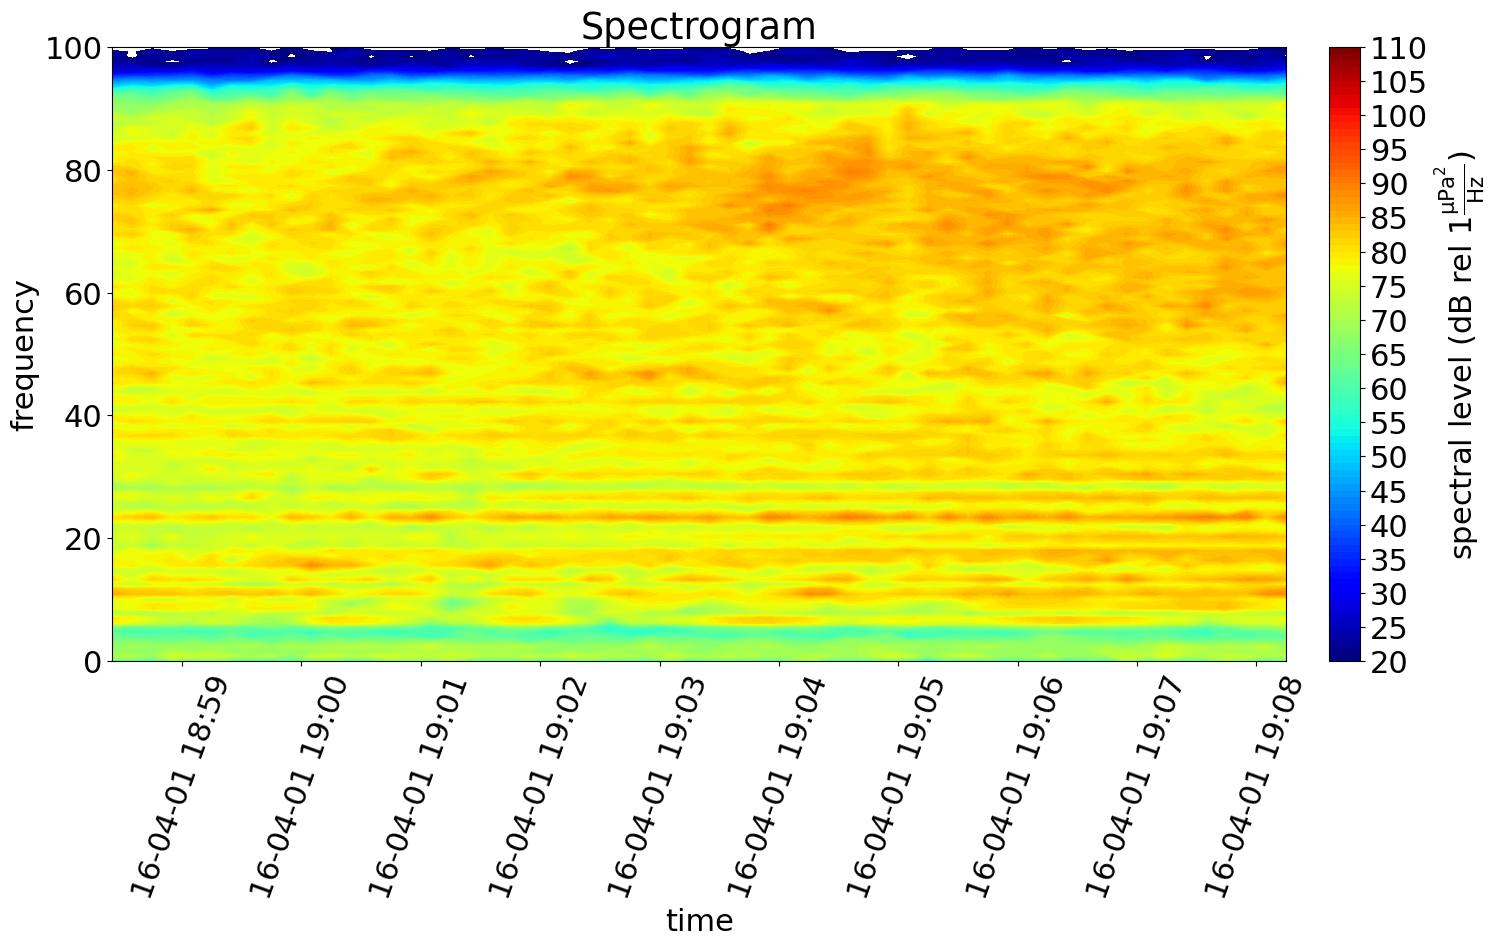

In [4]:
node = 'Axial_Base'

# this stuff can go in a for-loop that iterates thru the rows
num = 1
inst_id = df['instance_id'].iloc[num]
start_time = datetime.strptime(df['start_time'].iloc[num],'%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime(df['end_time'].iloc[num],'%Y-%m-%d %H:%M:%S')
print('PULLING DATA')
hdata = ooipy.get_acoustic_data_LF(start_time, end_time, node, verbose=True, zero_mean=True)
print('DATA PULLED')

fn.plot_psd(hdata.compute_psd_welch(L=256, overlap=0.3), vmax=110, fmax=10**2)
# aux code that I used to plot one instance
inst_id
ooipy.plot(hdata.compute_spectrogram(avg_time=10, overlap=0.5, L=256), fmax=100, vmax=110)
ooiplt.plot_spectrogram(hdata.compute_spectrogram(avg_time=10, overlap=0.5, L=256), vmax=110, fmax=100)

In [7]:
(hdata.compute_psd_welch(L=256, overlap=0.3))

## Iterate through Axial Base metadata CSV

In [ ]:
node = 'Axial_Base'
gen_path = 'C:/Users/UserALai/Documents/Work/Ocean Data'
spec_filepath = gen_path + '/plots/spectograms/'
psd_filepath = gen_path + '/plots/PSDs/'


for i in range(len(df.index)-10, len(df.index)): # iterate thru last 10 for ease
    inst_id = df['instance_id'].iloc[i]
    start_time = datetime.strptime(df['start_time'].iloc[i],'%Y-%m-%d %H:%M:%S')
    end_time = datetime.strptime(df['end_time'].iloc[i],'%Y-%m-%d %H:%M:%S')
    hdata = ooipy.get_acoustic_data_LF(start_time, end_time, node, verbose=True, zero_mean=True)

    spec = hdata.compute_spectrogram(avg_time=10, overlap=0.5, L=256)
    psd = hdata.compute_psd_welch(L=256, overlap=0.3)

    #ooiplt.plot_spectrogram(spec, plot=False, save=True, vmax=110, fmax=100, filename=spec_filepath + inst_id + '.png')
    ooipy.plot(spec, plot=False, save=True, vmax=110, fmax=100, filename=spec_filepath + inst_id + '.png')
    #fn.plot_psd(psd,plot=False,save=True,fmax=100,vmax=110,filename=psd_filepath + inst_id + '.png')
    # Don't need to use Khirod's plotting function, OOIPY default works fine
    ooipy.plot(psd,plot=False,save=True,fmax=100,vmax=110,filename=psd_filepath + inst_id + '.png')